L'obiettivo del progetto è completare cifre minst di cui è visibile solo una metà. Anche la classe della cifra può essere utilizzata per la ricostruzione, se si ritiene utile.

In [1]:
import tensorflow as tf

2026-01-07 20:10:22.182473: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-07 20:10:22.183817: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-07 20:10:22.186799: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-07 20:10:22.193914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767813022.207536  250059 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767813022.21

In [2]:
from tensorflow.keras.layers import concatenate,Reshape, Input, Conv2D, Conv2DTranspose, ZeroPadding2D, Dense, Flatten, GlobalMaxPooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras.datasets import mnist

In [3]:
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

Verifichiamo shape e range dei dati.

In [4]:
print(x_train.shape)
print(x_train.min())
print(x_train.max())

(60000, 28, 28, 1)
0.0
1.0


Definiamo un semplice generatore che ritorna i valori di input e l'output atteso.

In [5]:
def generator(data,label,batchsize):
  x = np.zeros((batchsize,28,28,1))
  while True:
    batch_id = np.random.randint(0,data.shape[0],batchsize)
    x[:,:,:14] = data[batch_id,:,:14]
    yield (x,label[batch_id]),data[batch_id]

In [6]:
one_generator = generator(x_train,y_train,1)

Visualizziamo input e output atteso (ground truth)

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_sample(x,lable,y):
  fig, ax = plt.subplots(1,2)
  ax[0].imshow(x[:,:,0],cmap='gray')
  ax[0].set_title(f'Lable {lable}')
  ax[1].imshow(y[:,:,0],cmap='gray')
  ax[1].set_title('Ground Truth')
  plt.show()

(1, 28, 28, 1)


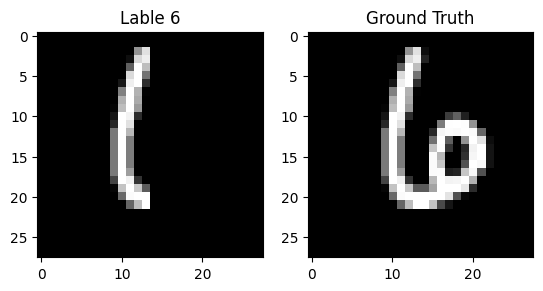

In [9]:
(x,l),y = next(one_generator)
print(x.shape)
plot_sample(x[0],l[0],y[0])

Definiamo una semplice baseline che completa la figura con una cifra "media".

In [10]:
mean_digit = np.zeros((10,28,28,1))
for i in range(10):
  mean_digit[i] = np.mean(x_train[y_train==i],axis=0)
#normalizaion
mean_digit = mean_digit - mean_digit.min()
mean_digit = mean_digit/mean_digit.max()

In [11]:
def baseline(x,l):
  res = np.copy(x)
  res[:,:,14:28] = mean_digit[l,:,14:28]
  return res

(1, 28, 28, 1)


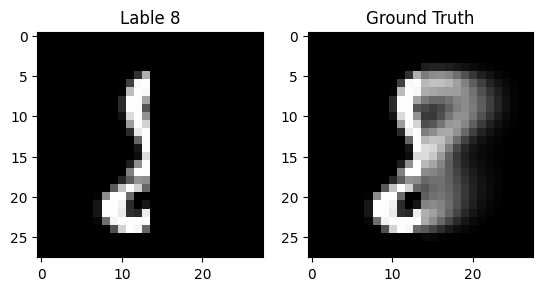

In [12]:
(x,l),y = next(one_generator)
print(x.shape)
plot_sample(x[0],l[0],baseline(x,l)[0])

Come metrica di valutazione usiamo mean squared error, ma al fine di meglio evidenziare il risultato consideriamo il rapporto con la baseline.

In [13]:
def evaluation(pred,l,y):
  res_baseline = baseline(y,l) #baseline for y or the input x is the same
  mse_baseline = np.mean((y-res_baseline)**2)
  mse = np.mean((y-pred)**2)
  print(mse)
  return mse/mse_baseline

Il miglior risultato possibile è 0 (match perfetto), e passando la baseline si ottiene 1. Valori inferiori a 1 sono insufficienti.

Restituire il risultato misurato su tutto il test_set.

Esempi:

In [14]:
evaluation(x_test,y_test,x_test)

0.0


0.0

In [15]:
test_baseline = baseline(x_test,y_test)

In [16]:
evaluation(test_baseline,y_test,x_test)

0.0286512


1.0

# Cosa consegnare

Dovete consegnare un solo notebook, con la vostra migliore soluzione in termini della metrica sopra definita. Se avete provato altre soluzioni potete discuterle brevemente.

Per il modello consegnato dovete fornire la traccia del training, ed eventualmente dei diagrammi della storia.

Rendete disponibili i pesi del modello mediante gdown. Predisponete il motebook in modo do poterli caricare.

Buon lavoro.